

### import Neseccary packages


In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd
import seaborn as sns
import numpy as np
from PIL import Image as im
from warnings import filterwarnings
filterwarnings('ignore')




### make functions to Read image as RGP 


In [2]:

def load_and_show_image(image_path):
    image = mplt.image.imread(image_path)
    print(f"Image shape: {image.shape}")  # (height, width, channels)
    print(f"Image size: {image.size}")    # total number of pixels * channels
    plt.imshow(image)
    plt.title("Original Image")
    plt.show()
    return image


### Reshape to (num_pixels, 3 channels)


In [3]:

def reshape_image_for_clustering(image):
   
    X = image.reshape(-1, 3)  # Reshape to (num_pixels, 3 channels)
    print(f"Reshaped data size: {X.size}")
    print(f"Reshaped data shape: {X.shape}")
    return X


### Make function to Finds the optimal number of clusters using the elbow method.


In [4]:
def find_optimal_clusters(X, max_clusters=10):

    wcss_list = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
        kmeans.fit(X)
        wcss_list.append(kmeans.inertia_)  # Inertia is WCSS

    plt.plot(range(1, max_clusters + 1), wcss_list)
    plt.title('The Elbow Method Graph')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS')
    plt.show()
    # This plot helps visually determine a suitable number of clusters
    # Look for an "elbow" where the decrease in WCSS starts to slow down.


### Make function to Applies K-means clustering for image segmentation


In [5]:
def apply_kmeans_segmentation(X, image, n_clusters=3):

    model = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    model.fit(X)
    image_Seg = model.cluster_centers_[model.labels_]
    print(f"Segmented data size:{image_Seg.size}, Segmented data shape:{image_Seg.shape}")

    image_Seg = np.reshape(image_Seg, image.shape)
    print(f"Reshaped segmented data size:{image_Seg.size}, Reshaped segmented data shape:{image_Seg.shape}")
    plt.imshow(image_Seg / 255)  # Normalize pixel values for display
    plt.title(f"Segmented Image (k={n_clusters})")
    plt.show()
    return image_Seg


### make function to  Saves the segmented image to a file.


In [6]:
def save_segmented_image(image_Seg, output_path='segmented_image.jpg'):
 
    image_Seg = image_Seg.astype(np.uint8)
    data = im.fromarray(image_Seg)
    data.save(output_path)
    print(f"Segmented image saved to: {output_path}")


### make function to Applies PCA for dimensionality reduction.


In [7]:
def apply_pca(X,image, n_components=2):

    pca = PCA(n_components=n_components)
    compress_image=pca.fit_transform(X)
    back_to_original=pca.inverse_transform(compress_image)
    back_to_original=back_to_original.reshape(image.shape)
    back_to_original=back_to_original.astype(np.uint8)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title('original image')
    plt.subplot(1,2,2)
    plt.imshow(back_to_original)
    plt.title(f'PCA reduced image with {n_components} components')
    plt.show()
    return back_to_original

Image shape: (1032, 736, 3)
Image size: 2278656


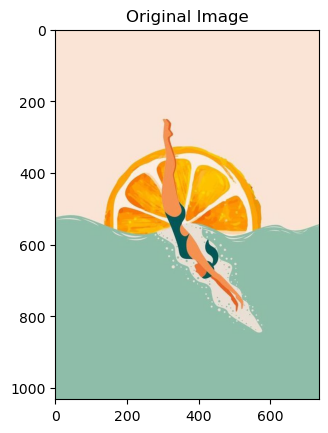

Reshaped data size: 2278656
Reshaped data shape: (759552, 3)


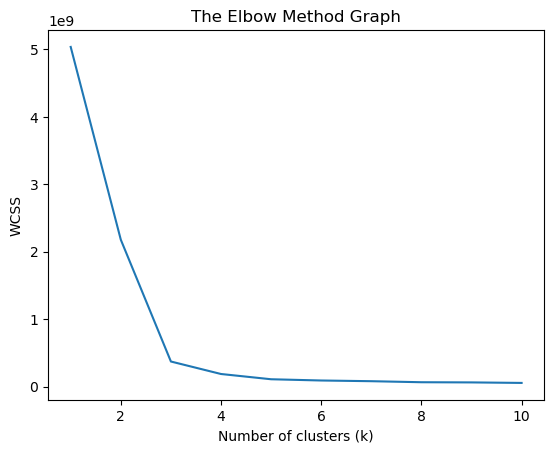

Segmented data size:2278656, Segmented data shape:(759552, 3)
Reshaped segmented data size:2278656, Reshaped segmented data shape:(1032, 736, 3)


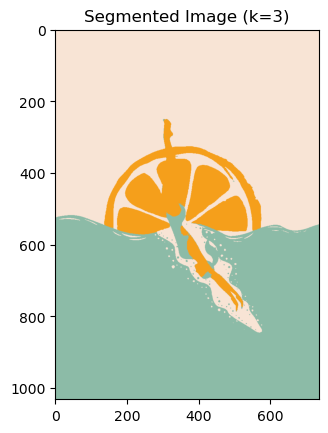

Segmented image saved to: segmented_diver.jpg


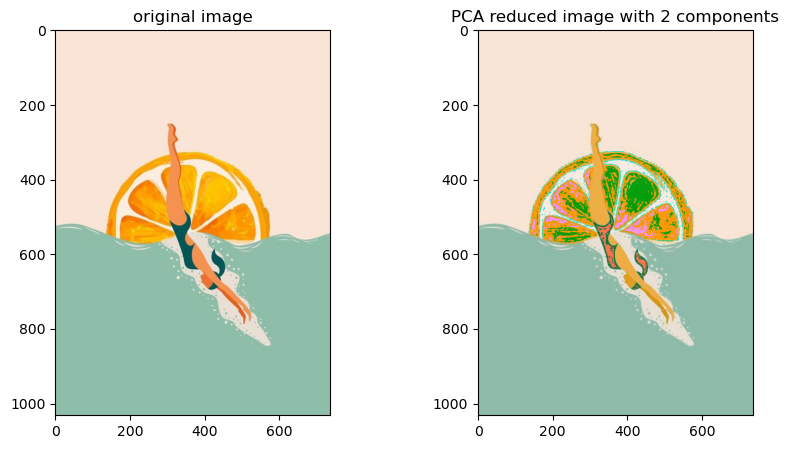

In [8]:
image_path = 'diver.jpg'
image = load_and_show_image(image_path)

X = reshape_image_for_clustering(image)

find_optimal_clusters(X)  # Display elbow plot

segmented_image = apply_kmeans_segmentation(X,image, n_clusters=3) # Replace with the chosen n_clusters.

save_segmented_image(segmented_image, output_path='segmented_diver.jpg')

pca_reconstructed_image=apply_pca(X,image,n_components=2)